Here are trying all the models we made in Notebook1 after excluding the Fe-S-C points

In [2]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing, neighbors, svm
from sklearn.model_selection import train_test_split
from scipy.optimize import curve_fit
import statsmodels.api as sm
import statsmodels.formula.api as smf
import re
%matplotlib inline
plt.style.use('seaborn-white')

**Dealing with high leverage points**

**Removed the 3 data points from the Fe-S-C system**

If we believe that an outlier has occurred due to an error in data collection
or recording, then one solution is to simply remove the observation.
However, care should be taken, since an outlier may instead indicate a
deficiency with the model, such as a **missing predictor**.
Which indicates, that temp or Fe/Ni ratio may be needed to comment on Fe-S-C points.

In [6]:
data2 = pd.ExcelFile('ModifiedData/Cu_S-C_del.xlsx')
print(data2.sheet_names)
df3 = data2.parse('Sheet1')
df3.head(5)

df4 = df3.drop(['Reference', 'Run #', 'D(Cu)'], axis=1)
df4.dropna()
pd.options.display.max_rows = 999
df4.info()

df4['FeDomains'] = np.exp(df4['LnFeDomains'])
df4['squaredFeDomains'] = np.square(df4['FeDomains'])
df4.head(69)

['Sheet1', 'Sheet3', 'xS vs FeS domain']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 4 columns):
Dinv           69 non-null float64
LnFeDomains    69 non-null float64
LnDinv         69 non-null float64
X              69 non-null int64
dtypes: float64(3), int64(1)
memory usage: 2.2 KB


,Dinv,LnFeDomains,LnDinv,X,FeDomains,squaredFeDomains
0,2.325581,-0.063935,0.843970,1,0.938066,0.879968
1,3.125000,-0.171537,1.139434,1,0.842369,0.709586
2,3.030303,-0.297457,1.108663,1,0.742704,0.551610
3,3.030303,-0.565593,1.108663,1,0.568023,0.322650
4,4.166667,-0.818951,1.427116,1,0.440894,0.194387
5,4.166667,-0.977994,1.427116,1,0.376065,0.141425
6,5.555556,-1.540667,1.714798,1,0.214238,0.045898
7,7.142857,-1.522616,1.966113,1,0.218141,0.047585
8,6.060606,-1.208104,1.801810,1,0.298763,0.089259
9,4.347826,-0.943130,1.469676,1,0.389407,0.151638


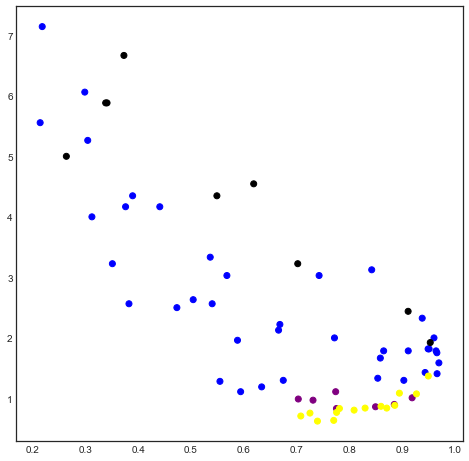

In [7]:
label = df4['X']
colors = ['blue','purple','yellow','green','red','black']

fig = plt.figure(figsize=(8,8))
plt.scatter(df4['FeDomains'], df4['Dinv'], c=label,cmap=matplotlib.colors.ListedColormap(colors))

plt.show()

In [8]:
data3 = pd.ExcelFile('ModifiedData/Cu_sys_intro.xlsx')
df5 = data3.parse('Sheet1')
df5.head(5)

df6 = df5.drop(['Reference', 'Run #', 'D(Cu)'], axis=1)
df6.dropna()
pd.options.display.max_rows = 999
df6.info()

df6['FeDomains'] = np.exp(df6['LnFeDomains'])
df6['squaredFeDomains'] = np.square(df4['FeDomains'])
df6.head(69)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 4 columns):
Dinv           72 non-null float64
LnFeDomains    72 non-null float64
LnDinv         72 non-null float64
X              72 non-null int64
dtypes: float64(3), int64(1)
memory usage: 2.3 KB


,Dinv,LnFeDomains,LnDinv,X,FeDomains,squaredFeDomains
0,2.325581,-0.063935,0.843970,1,0.938066,0.879968
1,3.125000,-0.171537,1.139434,1,0.842369,0.709586
2,3.030303,-0.297457,1.108663,1,0.742704,0.551610
3,3.030303,-0.565593,1.108663,1,0.568023,0.322650
4,4.166667,-0.818951,1.427116,1,0.440894,0.194387
5,4.166667,-0.977994,1.427116,1,0.376065,0.141425
6,5.555556,-1.540667,1.714798,1,0.214238,0.045898
7,7.142857,-1.522616,1.966113,1,0.218141,0.047585
8,6.060606,-1.208104,1.801810,1,0.298763,0.089259
9,4.347826,-0.943130,1.469676,1,0.389407,0.151638


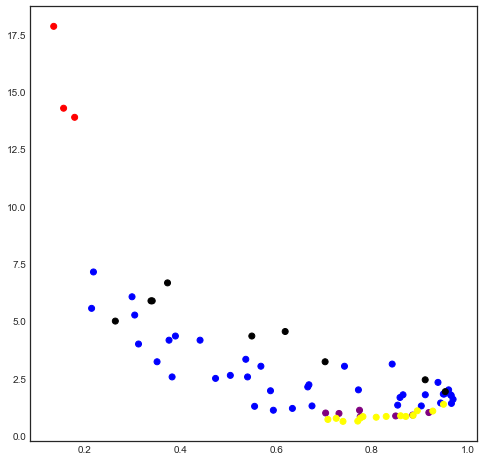

In [9]:
label = df6['X']
colors = ['blue','purple','yellow','green','red','black']

fig = plt.figure(figsize=(8,8))
plt.scatter(df6['FeDomains'], df6['Dinv'], c=label,cmap=matplotlib.colors.ListedColormap(colors))

plt.show()

These RED points are removed.

BLUE == Fe-Ni-S, PURPLE == Fe-Ni-P, YELLOW == Fe-Ni-C, BLACK == Fe-Ni-S-P ,RED == Fe-S-C

### Fitting different models

**(A1) Linear**

C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


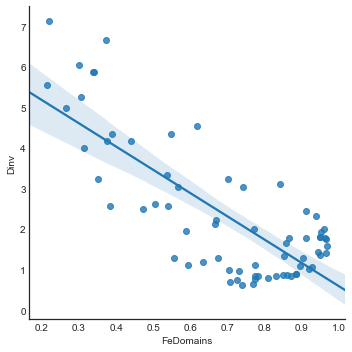

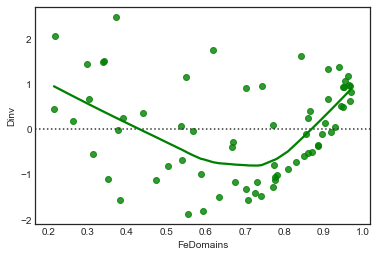

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Dinv   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     104.0
Date:                Sat, 15 Dec 2018   Prob (F-statistic):           2.90e-15
Time:                        15:41:29   Log-Likelihood:                -100.56
No. Observations:                  69   AIC:                             205.1
Df Residuals:                      67   BIC:                             209.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.3292      0.410     15.435      0.000       5.511       7.148
FeDomains     -5.7314      0.562    -10.197      0.000      -6.853      -4.609
==============================================================================
Omnibus:                        4.830   Durbin-Watson:                   0.585
Prob(Omnibus):                  0.089   Jarque-Bera (JB):                2.382
Skew:                           0.159   Prob(JB):                        0.304
Kurtosis:                       2.147   Cond. No.                         6.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
sns.lmplot(x='FeDomains', y='Dinv', data=df4)
plt.show()
sns.residplot(x='FeDomains', y='Dinv', lowess=True, order = 1,data=df4, color='green')
plt.show()
est = smf.ols('Dinv ~ FeDomains', df4).fit()
est.summary()

Non-linearity in the data is clearly visible here. And can not comment on heteroscedasticity
**Checking with LnDinv**

C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


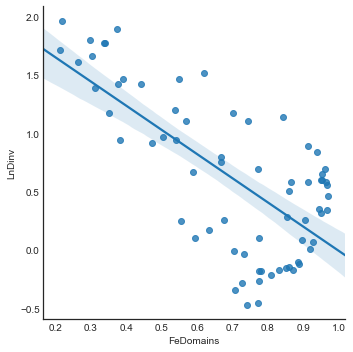

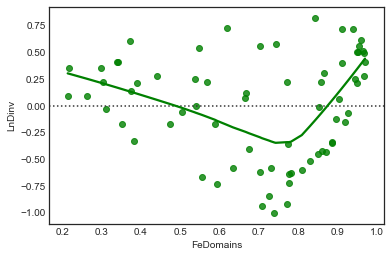

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 LnDinv   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     64.66
Date:                Sat, 15 Dec 2018   Prob (F-statistic):           2.03e-11
Time:                        15:48:20   Log-Likelihood:                -46.793
No. Observations:                  69   AIC:                             97.59
Df Residuals:                      67   BIC:                             102.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0670      0.188     10.987      0.000       1.691       2.442
FeDomains     -2.0737      0.258     -8.041      0.000      -2.588      -1.559
==============================================================================
Omnibus:                        8.568   Durbin-Watson:                   0.366
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                3.852
Skew:                          -0.321   Prob(JB):                        0.146
Kurtosis:                       2.036   Cond. No.                         6.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
sns.lmplot(x='FeDomains', y='LnDinv', data=df4)
plt.show()
sns.residplot(x='FeDomains', y='LnDinv', lowess=True, order = 1,data=df4, color='green')
plt.show()
est = smf.ols('LnDinv ~ FeDomains', df4).fit()
est.summary()

r2 is unacceptable >>> **rejected**

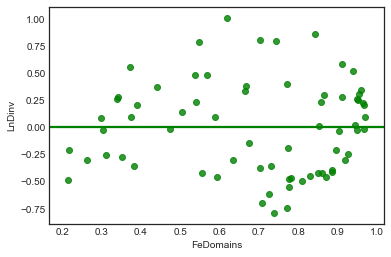

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 LnDinv   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     49.59
Date:                Sat, 15 Dec 2018   Prob (F-statistic):           7.12e-14
Time:                        15:51:10   Log-Likelihood:                -38.450
No. Observations:                  69   AIC:                             82.90
Df Residuals:                      66   BIC:                             89.60
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.7631      0.433      8.690      0.000       2.898       4.628
np.square(FeDomains)     5.0074      1.178      4.249      0.000       2.655       7.360
FeDomains               -8.3605      1.497     -5.584      0.000     -11.350      -5.371
==============================================================================
Omnibus:                        2.944   Durbin-Watson:                   0.545
Prob(Omnibus):                  0.229   Jarque-Bera (JB):                2.156
Skew:                           0.265   Prob(JB):                        0.340
Kurtosis:                       2.315   Cond. No.                         50.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
sns.residplot(x='FeDomains', y='LnDinv', lowess=True, order = 2,data=df4, color='green')
plt.show()
est = smf.ols('LnDinv ~ np.square(FeDomains) + FeDomains', df4).fit()
est.summary()

**(A2) Squared**

In [21]:
# fit = np.polyfit(df4['FeDomains'],df4['Dinv'], 2)
# fit_fn = np.poly1d(fit)

# plt.plot(df4['FeDomains'],df4['Dinv'], '.', np.sort(df4['FeDomains']), fit_fn(np.sort(df4['FeDomains'])), '--r', linewidth=2)
# plt.xlabel("FeDomains")
# plt.ylabel("Dinv")
# plt.show()
# print('Function equation : \n',fit_fn)

# sns.residplot(x='squaredFeDomains', y='Dinv',lowess=True, order = 1,data=df4, color='green')
# plt.show()

## This thing fucks up, I don't know why, gives a st line in the residual plot.

C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


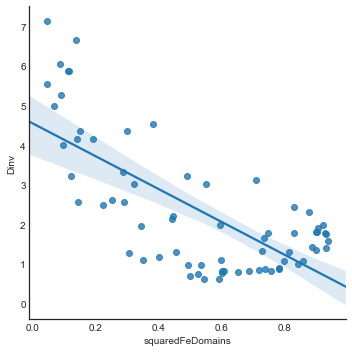

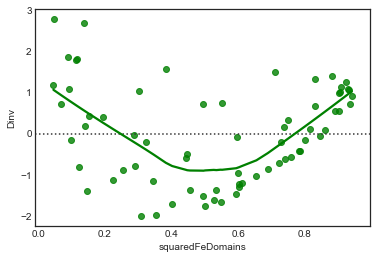

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Dinv   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     91.81
Date:                Sat, 15 Dec 2018   Prob (F-statistic):           8.60e-20
Time:                        15:49:28   Log-Likelihood:                -86.980
No. Observations:                  69   AIC:                             180.0
Df Residuals:                      66   BIC:                             186.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           10.8787      0.875     12.433      0.000       9.132      12.626
FeDomains          -22.5945      3.025     -7.469      0.000     -28.635     -16.554
squaredFeDomains    13.4313      2.381      5.641      0.000       8.678      18.185
==============================================================================
Omnibus:                        8.899   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                8.470
Skew:                           0.814   Prob(JB):                       0.0145
Kurtosis:                       3.545   Cond. No.                         50.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
sns.lmplot(x='squaredFeDomains', y='Dinv', data=df4)
plt.show()
sns.residplot(x='squaredFeDomains', y='Dinv', lowess=True, order = 1,data=df4, color='green')
plt.show()
est = smf.ols('Dinv ~ FeDomains + squaredFeDomains', df4).fit()
est.summary()

This one is again indicating non-linearity.

C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


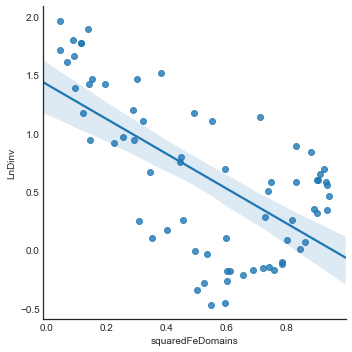

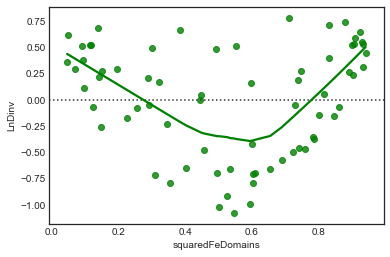

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 LnDinv   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     49.59
Date:                Sat, 15 Dec 2018   Prob (F-statistic):           7.12e-14
Time:                        15:49:43   Log-Likelihood:                -38.450
No. Observations:                  69   AIC:                             82.90
Df Residuals:                      66   BIC:                             89.60
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.7631      0.433      8.690      0.000       2.898       4.628
FeDomains           -8.3605      1.497     -5.584      0.000     -11.350      -5.371
squaredFeDomains     5.0074      1.178      4.249      0.000       2.655       7.360
==============================================================================
Omnibus:                        2.944   Durbin-Watson:                   0.545
Prob(Omnibus):                  0.229   Jarque-Bera (JB):                2.156
Skew:                           0.265   Prob(JB):                        0.340
Kurtosis:                       2.315   Cond. No.                         50.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
sns.lmplot(x='squaredFeDomains', y='LnDinv', data=df4)
plt.show()
sns.residplot(x='squaredFeDomains', y='LnDinv', lowess=True, order = 1,data=df4, color='green')
plt.show()
est = smf.ols('LnDinv ~ FeDomains + squaredFeDomains', df4).fit()
est.summary()

Taking log(y) made no impact on the non-linear rel^n of Predictor and response.

**(A3) LOG**

C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


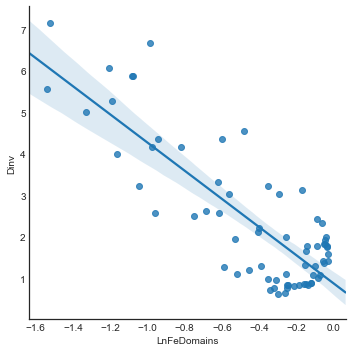

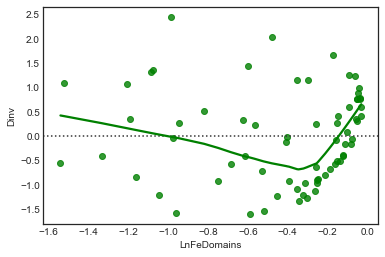

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Dinv   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     143.6
Date:                Sat, 15 Dec 2018   Prob (F-statistic):           2.56e-18
Time:                        15:52:35   Log-Likelihood:                -93.369
No. Observations:                  69   AIC:                             190.7
Df Residuals:                      67   BIC:                             195.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.8732      0.168      5.186      0.000       0.537       1.209
LnFeDomains    -3.3978      0.284    -11.982      0.000      -3.964      -2.832
==============================================================================
Omnibus:                        2.763   Durbin-Watson:                   0.663
Prob(Omnibus):                  0.251   Jarque-Bera (JB):                2.252
Skew:                           0.311   Prob(JB):                        0.324
Kurtosis:                       2.371   Cond. No.                         3.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
sns.lmplot(x='LnFeDomains', y='Dinv', data=df4)
plt.show()
sns.residplot(x='LnFeDomains', y='Dinv', lowess=True, order = 1,data=df4, color='green')
plt.show()
est = smf.ols('Dinv ~ LnFeDomains', df4).fit()
est.summary()

Non-linearity in the PR relationship, heteroscedasticity present

C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


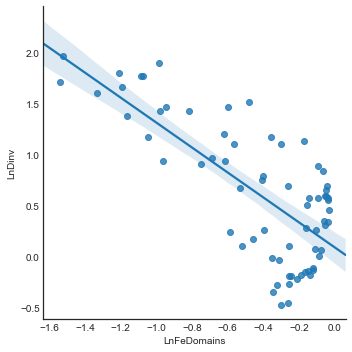

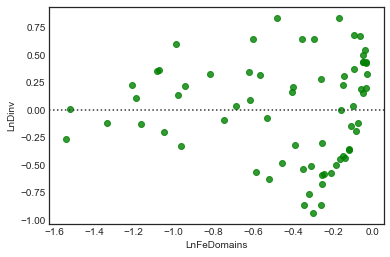

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 LnDinv   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     79.68
Date:                Sat, 15 Dec 2018   Prob (F-statistic):           5.19e-13
Time:                        15:52:40   Log-Likelihood:                -43.068
No. Observations:                  69   AIC:                             90.14
Df Residuals:                      67   BIC:                             94.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0966      0.081      1.189      0.239      -0.066       0.259
LnFeDomains    -1.2210      0.137     -8.926      0.000      -1.494      -0.948
==============================================================================
Omnibus:                        6.971   Durbin-Watson:                   0.416
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                2.869
Skew:                          -0.166   Prob(JB):                        0.238
Kurtosis:                       2.058   Cond. No.                         3.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
sns.lmplot(x='LnFeDomains', y='LnDinv', data=df4)
plt.show()
sns.residplot(x='LnFeDomains', y='LnDinv', order = 1,data=df4, color='green')
plt.show()
est = smf.ols('LnDinv ~ LnFeDomains', df4).fit()
est.summary()

PR Relationship seems to be linear. Can't comment on heteroscedasticity. And r2 decreased too much.

**p-value of the intercept is again insignificant**. R2 value of the fit has decreased too much. Need to deal with the intercept / or the p-value

**(A4) Hyperbola**

popt:  [ 1.63608881 -0.42237708]
pcov:  [[ 0.01755015 -0.02977684]
 [-0.02977684  0.0630737 ]]


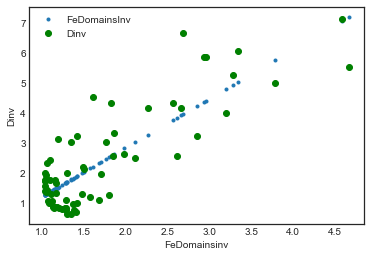

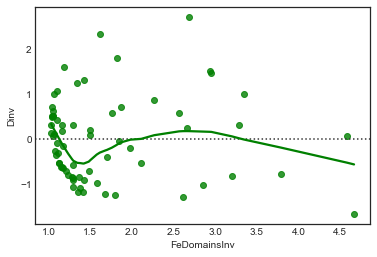

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Dinv   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     152.5
Date:                Sat, 15 Dec 2018   Prob (F-statistic):           6.27e-19
Time:                        15:52:42   Log-Likelihood:                -91.932
No. Observations:                  69   AIC:                             187.9
Df Residuals:                      67   BIC:                             192.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.4224      0.251     -1.682      0.097      -0.924       0.079
FeDomainsInv     1.6361      0.132     12.350      0.000       1.372       1.901
==============================================================================
Omnibus:                        5.033   Durbin-Watson:                   0.743
Prob(Omnibus):                  0.081   Jarque-Bera (JB):                4.646
Skew:                           0.635   Prob(JB):                       0.0980
Kurtosis:                       3.045   Cond. No.                         5.24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
df4['FeDomainsInv'] = np.reciprocal(df4['FeDomains'])
df4.head()

def hyperbola(t,a,b):
    return a*t + b

popt, pcov = curve_fit(hyperbola, df4['FeDomainsInv'], df4['Dinv'])

print('popt: ',popt)
print('pcov: ',pcov)


plt.plot(df4['FeDomainsInv'], hyperbola(df4['FeDomainsInv'], *popt), '.', )

plt.plot(df4['FeDomainsInv'],df4['Dinv'], marker='o', linestyle='none',  color='green')

plt.xlabel('FeDomainsinv')
plt.ylabel('Dinv')
plt.legend()
plt.show()

sns.residplot(x='FeDomainsInv', y='Dinv', lowess=True, order = 1,data=df4, color='green')
plt.show()

est = smf.ols('Dinv ~ FeDomainsInv', df4).fit()
est.summary()

popt:  [ 0.57899653 -0.35384341]
pcov:  [[ 0.00431707 -0.00732465]
 [-0.00732465  0.01551517]]


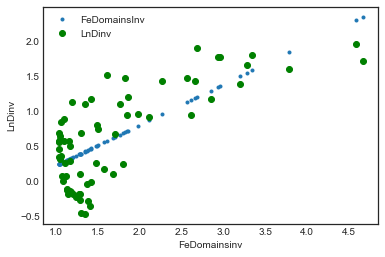

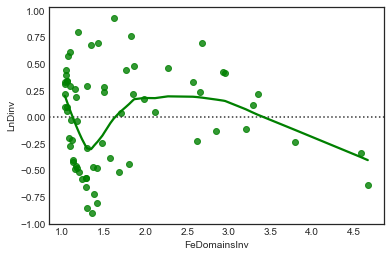

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 LnDinv   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     77.65
Date:                Sat, 15 Dec 2018   Prob (F-statistic):           8.31e-13
Time:                        15:52:42   Log-Likelihood:                -43.547
No. Observations:                  69   AIC:                             91.09
Df Residuals:                      67   BIC:                             95.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.3538      0.125     -2.841      0.006      -0.602      -0.105
FeDomainsInv     0.5790      0.066      8.812      0.000       0.448       0.710
==============================================================================
Omnibus:                        8.082   Durbin-Watson:                   0.455
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                2.858
Skew:                          -0.062   Prob(JB):                        0.240
Kurtosis:                       2.011   Cond. No.                         5.24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
popt4, pcov4 = curve_fit(hyperbola, df4['FeDomainsInv'], df4['LnDinv'])

print('popt: ',popt4)
print('pcov: ',pcov4)


plt.plot(df4['FeDomainsInv'], hyperbola(df4['FeDomainsInv'], *popt4), '.', )

plt.plot(df4['FeDomainsInv'],df4['LnDinv'], marker='o', linestyle='none',  color='green')

plt.xlabel('FeDomainsinv')
plt.ylabel('LnDinv')
plt.legend()
plt.show()

sns.residplot(x='FeDomainsInv', y='LnDinv', lowess=True, order = 1,data=df4, color='green')
plt.show()

est = smf.ols('LnDinv ~ FeDomainsInv', df4).fit()
est.summary()

Ahhhhh!!!!!!! shit! .................hyperbola model seems to be working only with those outliers, r2 decreased to almost half,plus non-linearity in the PR relationship is also sighted with heteroscedasticity.
**Hyperbola rejected**.

**SUMMARY: Removing the Fe-S-C doesn't improve the fit of the model A6, both the problems of low r-squared statistic and high p-value still persist.**


------------------------

S2:
	Model A7 and A8 (hyperbola) which showed promise are rejected, as there r-squared has now reduced significantly, and NL from the residuals is not that much reduced.
	Model A6, after removing the points also shows the same problem, now the r-squared is even lower, and the p-value is (0.236).
CONCLUSION1: If we are only considering 1 feature which is Fe Domains, then the best model seems to be Ln(FeDomains) vs Ln(Dinv), which is also obtained from the thermodynamic equations, but the high p-value associated with this model needs to be checked.


------------------------------